In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

In [2]:
data = pd.read_csv(r"..\Dataset Preparation\FinalData.csv")

In [3]:
data.head()

Exp   Folder   Mode  Frame     MeanR      VarR  MinR  Q1R  \
0  18_09_2024_2gSodium  01_Full  Degen   1270  0.011956  0.129460   0.0  0.0   
1  18_09_2024_2gSodium  01_Full  Degen   1271  0.009799  0.095385   0.0  0.0   
2  18_09_2024_2gSodium  01_Full  Degen   1272  0.011616  0.113608   0.0  0.0   
3  18_09_2024_2gSodium  01_Full  Degen   1273  0.009920  0.092299   0.0  0.0   
4  18_09_2024_2gSodium  01_Full  Degen   1274  0.009822  0.094579   0.0  0.0   

   MedR  Q3R  ...     VarIR  MinIR      Q1IR     MedIR      Q3IR     MaxIR  \
0   0.0  0.0  ...  1.138393    0.0  1.242808  1.196550  1.211091  1.044270   
1   0.0  0.0  ...  1.138973    0.0  1.242930  1.196922  1.211649  1.042752   
2   0.0  0.0  ...  1.139380    0.0  1.243419  1.196984  1.211622  1.036582   
3   0.0  0.0  ...  1.138379    0.0  1.244232  1.196922  1.210374  1.038002   
4   0.0  0.0  ...  1.138545    0.0  1.242483  1.197728  1.210693  1.047502   

     SkewIR    KurtIR  PtsIR  Concentration  
0  1.773443  0.983807    1.0    2030.110000  
1  1.774462  0.980042    1.0    2022.796748  
2  1.771977  0.982781    1.0    2015.548649  
3  1.771729  0.985877    1.0    2008.365266  
4  1.768001  0.984631    1.0    2001.246166  

[5 rows x 45 columns]

In [4]:
exp_list = list(data['Exp'].unique())
df0 = data[data['Exp'] == exp_list[0]]
df1 = data[data['Exp'] == exp_list[1]]
df2 = data[data['Exp'] == exp_list[2]]
df3 = data[data['Exp'] == exp_list[3]]

In [12]:
df3.head()

Exp Folder   Mode  Frame     MeanR      VarR  \
11078  08_04_2024_2gSodiumForDA     01  Degen      0  0.376693  0.592468   
11079  08_04_2024_2gSodiumForDA     01  Degen      1  0.414604  0.656142   
11080  08_04_2024_2gSodiumForDA     01  Degen      2  0.417792  0.658309   
11081  08_04_2024_2gSodiumForDA     01  Degen      3  0.420072  0.660808   
11082  08_04_2024_2gSodiumForDA     01  Degen      4  0.424266  0.661822   

       MinR  Q1R  MedR  Q3R  ...     VarIR  MinIR      Q1IR     MedIR  \
11078   0.0  0.0   0.0  0.0  ...  0.878873    0.0  1.090731  1.072896   
11079   0.0  0.0   0.0  0.0  ...  0.923482    0.0  1.202325  1.163367   
11080   0.0  0.0   0.0  0.0  ...  0.924298    0.0  1.201814  1.163112   
11081   0.0  0.0   0.0  0.0  ...  0.924288    0.0  1.202496  1.164324   
11082   0.0  0.0   0.0  0.0  ...  0.923711    0.0  1.201090  1.163367   

           Q3IR     MaxIR    SkewIR    KurtIR  PtsIR  Concentration  
11078  1.105961  0.821868  0.054752  0.478513    1.0      58.550000  
11079  1.164930  0.908790  0.049616  0.579021    1.0      58.458168  
11080  1.166171  0.903935  0.048686  0.576418    1.0      58.366504  
11081  1.165261  0.913372  0.049185  0.577743    1.0      58.275008  
11082  1.164654  0.907012  0.050882  0.577495    1.0      58.183681  

[5 rows x 45 columns]

In [7]:
features = list(df0.describe().columns[1:-1])
target = 'Concentration'
len(features)

40

In [36]:
feature_names = ['Mean Range', 'Variance Range', 'Min Range', 'Q1 Range', 'Median Range', 'Q3 Range', 'Max Range', 'Skew Range', 'Kurt Range', 'Points Range', 'Mean Signal', 'Variance Signal', 'Min Signal', 'Q1 Signal', 'Median Signal', 'Q3 Signal', 'Max Signal', 'Skew Signal', 'Kurt Signal', 'Points Signal', 'Mean Reflect', 'Variance Reflect', 'Min Reflect', 'Q1 Reflect', 'Median Reflect', 'Q3 Reflect', 'Max Reflect', 'Skew Reflect', 'Kurt Reflect', 'Points Reflect', 'Mean IR', 'Variance IR', 'Min IR', 'Q1 IR', 'Median IR', 'Q3 IR', 'Max IR', 'Skew IR', 'Kurt IR', 'Points IR']

# EDA - Experiment 1 Data

## UVA

In [37]:
def plot_uva(df, features, v_dim = 5, plot_type='line'):
    # Plot side by side
    h_dim = math.ceil(len(features) / v_dim)
    fig, axes = plt.subplots(nrows=h_dim, ncols=v_dim, figsize=(12, 1 * h_dim))
    for i, ax in enumerate(axes.flat):
        if plot_type == 'line' :
            ax.plot(df[features[i]])
        else:
            sns.boxplot(data=df, y=features[i], ax=ax)
        ax.set_title(feature_names[i])
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.grid(True)

    plt.tight_layout()
    plt.show()

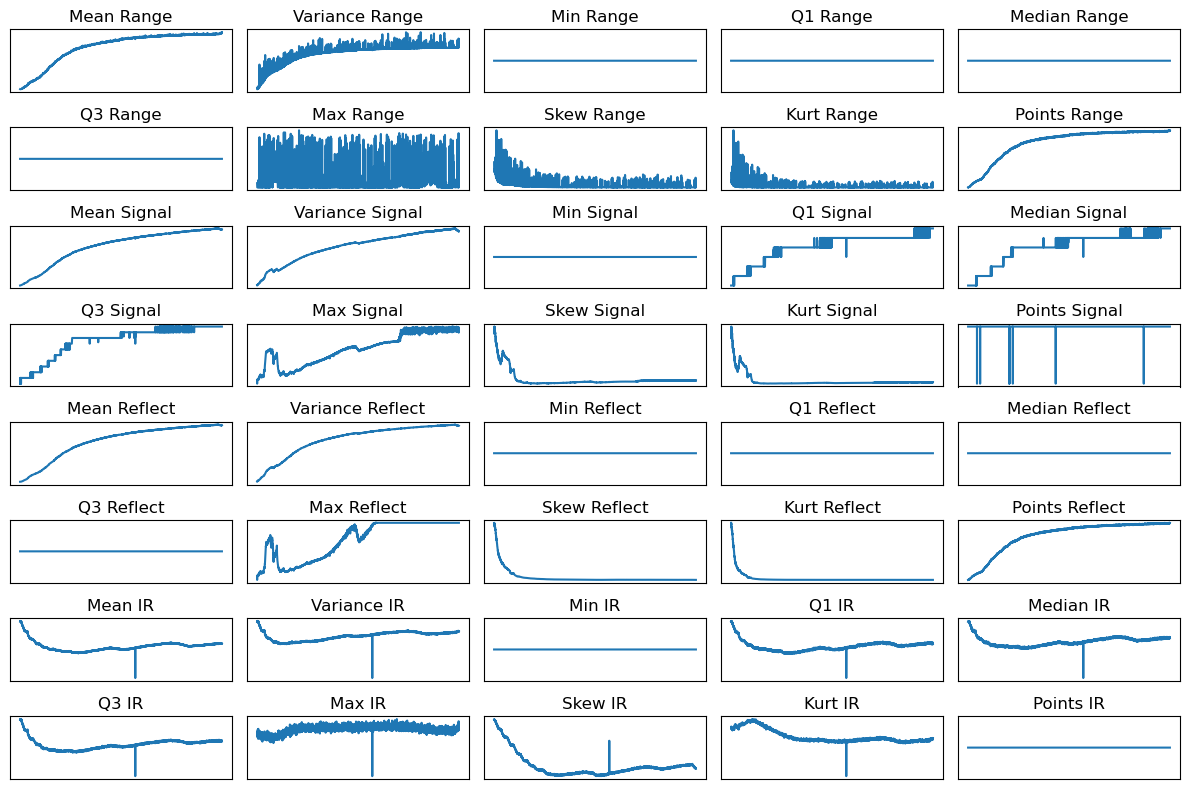

In [38]:
plot_uva(df0, features)

In [ ]:
df0

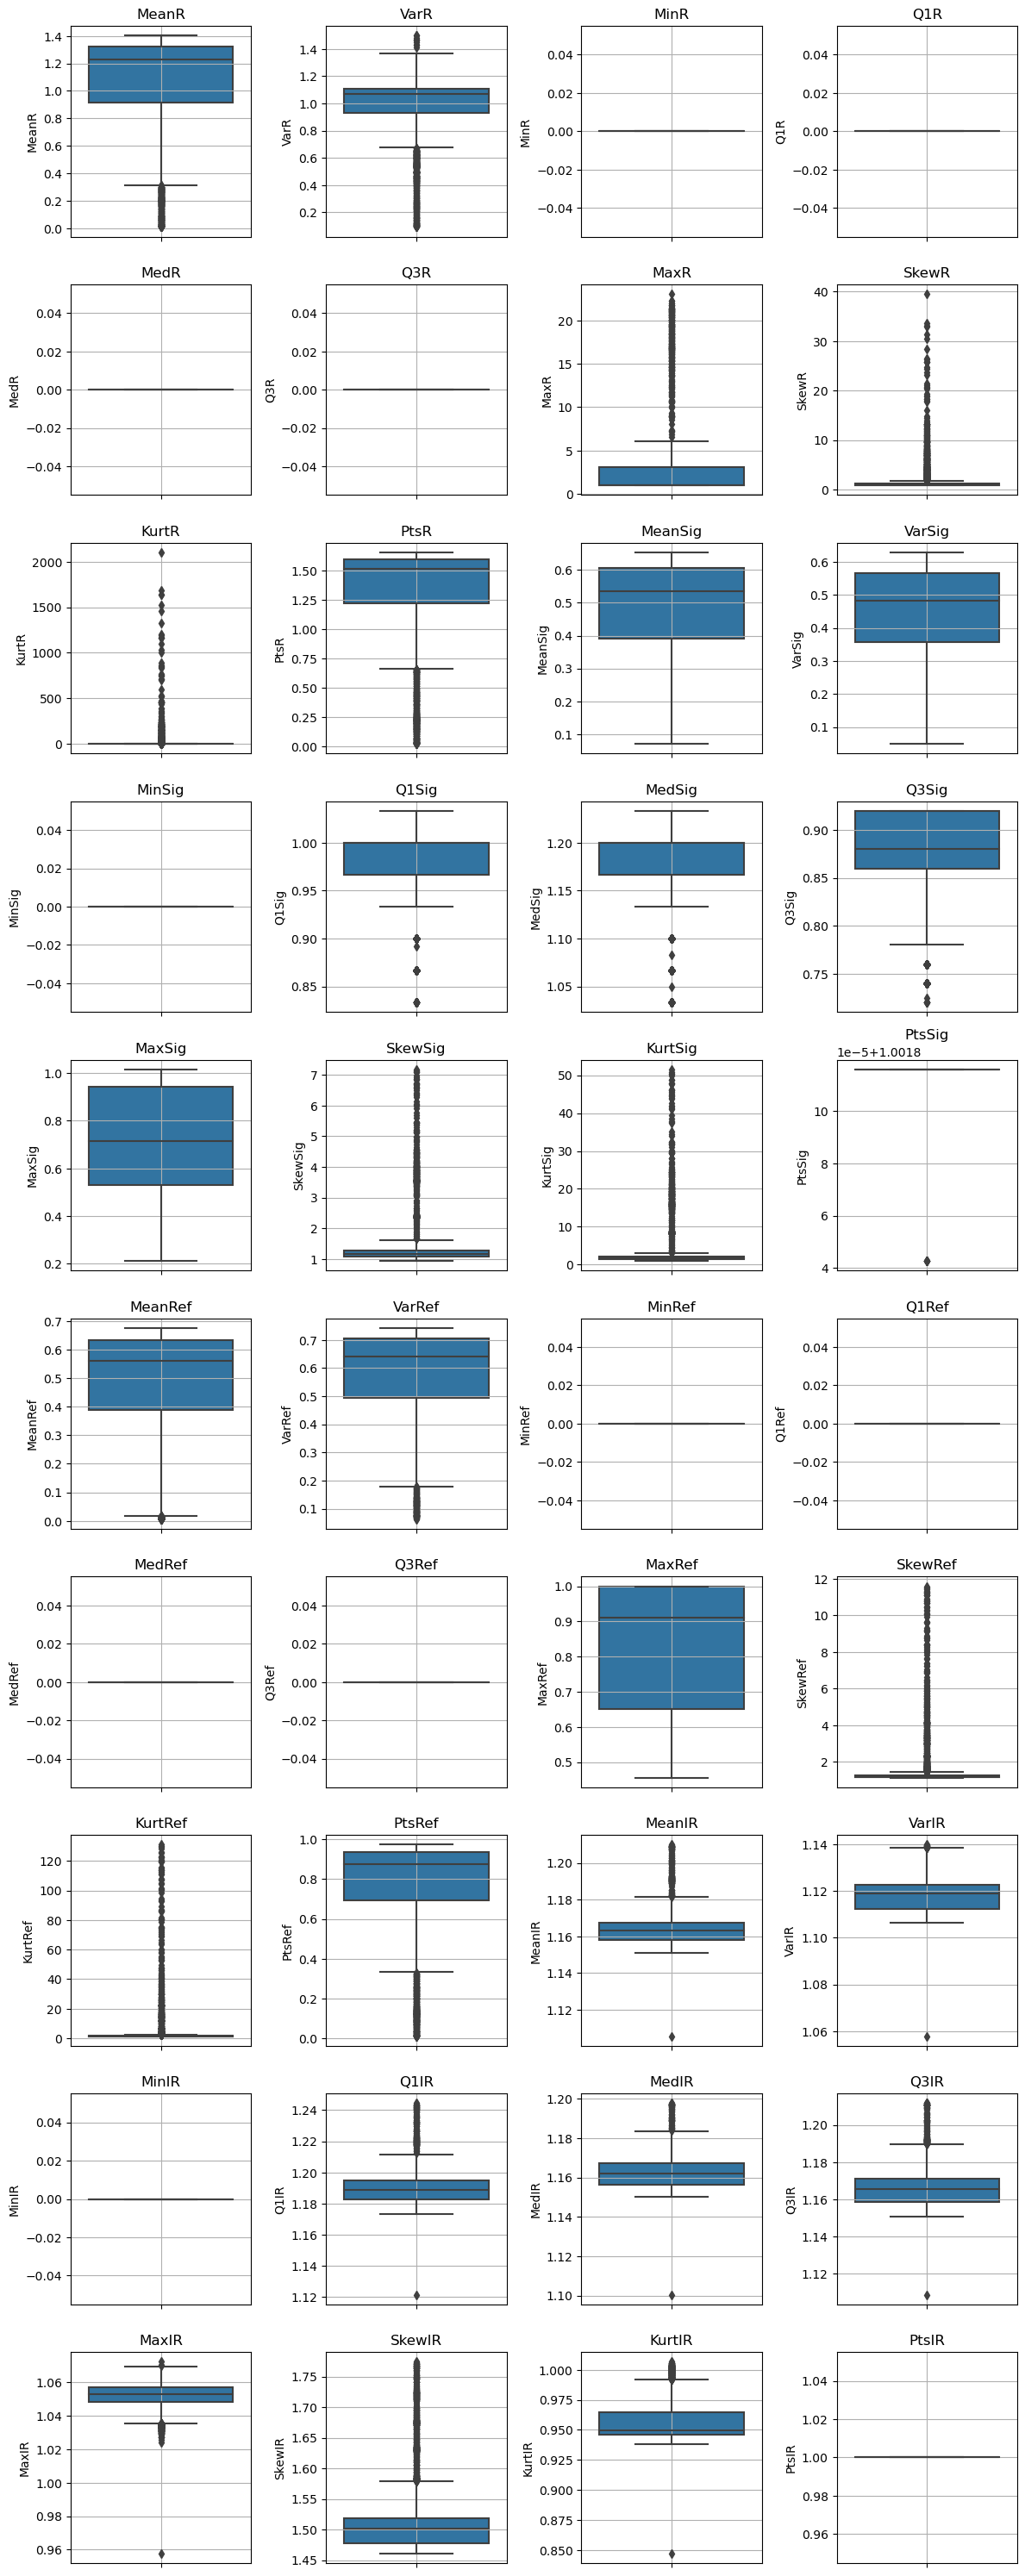

In [57]:
plot_uva(df0, features, plot_type='box')

In [105]:
df0.iloc[2090:2095]

Exp   Folder   Mode  Frame     MeanR      VarR  MinR  \
2090  18_09_2024_2gSodium  01_Full  Degen   3360  1.264171  1.077494   0.0   
2091  18_09_2024_2gSodium  01_Full  Degen   3361  1.264582  1.078275   0.0   
2092  18_09_2024_2gSodium  01_Full  Degen   3362  1.266207  1.077027   0.0   
2093  18_09_2024_2gSodium  01_Full  Degen   3363  1.234483  1.055179   0.0   
2094  18_09_2024_2gSodium  01_Full  Degen   3364  1.265881  1.080731   0.0   

      Q1R  MedR  Q3R  ...     VarIR  MinIR      Q1IR     MedIR      Q3IR  \
2090  0.0   0.0  0.0  ...  1.119397    0.0  1.186291  1.161238  1.164488   
2091  0.0   0.0  0.0  ...  1.119682    0.0  1.186291  1.161361  1.163824   
2092  0.0   0.0  0.0  ...  1.120250    0.0  1.185192  1.162724  1.164382   
2093  0.0   0.0  0.0  ...  1.057775    0.0  1.121514  1.100400  1.108804   
2094  0.0   0.0  0.0  ...  1.119656    0.0  1.186454  1.160990  1.164356   

         MaxIR    SkewIR    KurtIR  PtsIR  Concentration  
2090  1.052449  1.477075  0.944836    1.0     217.471442  
2091  1.061851  1.475773  0.943311    1.0     217.737526  
2092  1.062194  1.476088  0.944437    1.0     218.003653  
2093  0.957835  1.655517  0.847402    1.0     218.269822  
2094  1.058472  1.472501  0.946103    1.0     218.536032  

[5 rows x 45 columns]

## BVA

In [56]:
#Target vs Features
def plot_bva(df, features, target, v_dim = 4, plot_type='scatter'):
    h_dim = math.ceil(len(features) / v_dim)
    fig, axes = plt.subplots(nrows=h_dim, ncols=v_dim, figsize=(12, 2 * h_dim))
    for i, ax in enumerate(axes.flat):
        if plot_type == 'scatter' :
            sns.scatterplot(data=df, y=target, x=features[i], ax=ax)
        else:
            pass
        ax.set_title(feature_names[i])
        ax.set(xlabel=None)
        ax.set_xticks([])
        ax.set_yticks([])        
        ax.grid(True)

    plt.tight_layout()
    plt.show()

In [57]:
insig_features = ['MinR','Q1R','MedR','Q3R','MinSig', 'PtsSig', 'MinRef','Q1Ref','MedRef','Q3Ref', 'MinIR', 'PtsIR']
sig_features = [feature for feature in features if feature not in insig_features]

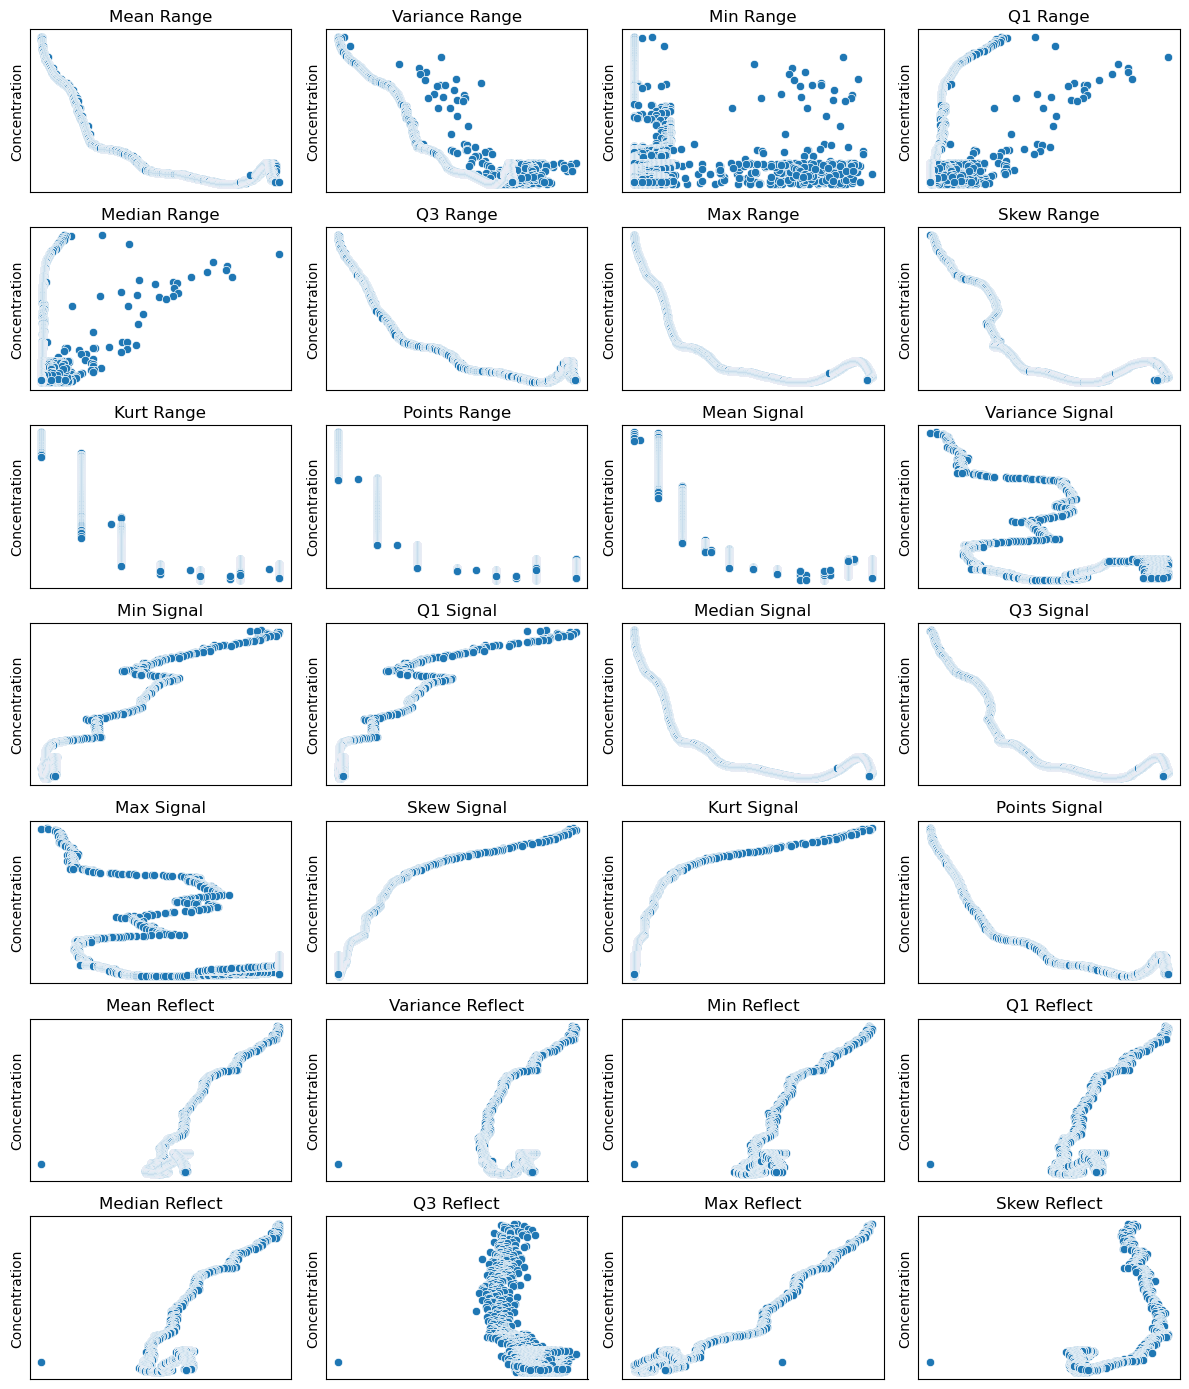

In [60]:
plot_bva(df0.drop(insig_features, axis=1), sig_features, target)

## Correlation with Features

In [46]:
def plot_corr(df, features, target=None, plot_type='Target'):
    plt.figure(figsize=(12,1))
    if plot_type == 'Target':
        corr_res = df[features + [target]].corr().dropna(how='all',axis=1).iloc[-1][:-1]
        corr_res = corr_res.sort_values()
    else:
        corr_df = df[features].corr().dropna(how='all').dropna(how='all',axis=1)
        corr_bin= corr_df.applymap(lambda x: 1 if abs(x) > 0.5 else 0)
        corr_res = corr_bin.sum(axis=1).sort_values()
    ax = sns.heatmap(corr_res.to_frame().T, annot=True, cmap="viridis", linewidths=0.5) #, xticklabels=series.index, yticklabels=["Series"])
    for text in ax.texts:
        text.set_rotation(90)  # Rotate text to vertical
        text.set_fontsize(8)   # Adjust font size if neede
    return corr_res

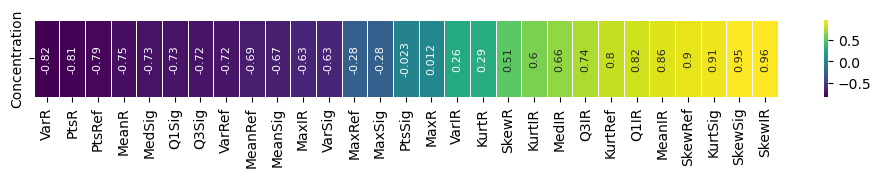

In [47]:
corr_res = plot_corr(df0, features, target)

In [45]:
corr_res[:-1]

MeanR     -0.751863
VarR      -0.820738
MaxR       0.011587
SkewR      0.512804
KurtR      0.287800
PtsR      -0.807492
MeanSig   -0.671403
VarSig    -0.628287
Q1Sig     -0.726728
MedSig    -0.734089
Q3Sig     -0.724129
MaxSig    -0.278518
SkewSig    0.948411
KurtSig    0.914402
PtsSig    -0.022667
MeanRef   -0.686269
VarRef    -0.721943
MaxRef    -0.283735
SkewRef    0.896287
KurtRef    0.804577
PtsRef    -0.789723
MeanIR     0.864567
VarIR      0.261221
Q1IR       0.822743
MedIR      0.664597
Q3IR       0.741545
MaxIR     -0.629409
SkewIR     0.959530
KurtIR     0.602193
Name: Concentration, dtype: float64

## Features interdependancy

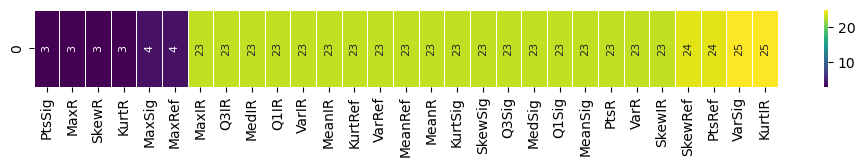

In [162]:
plot_corr(df3, features, plot_type='Features')

# EDA - Experiment 2 Data

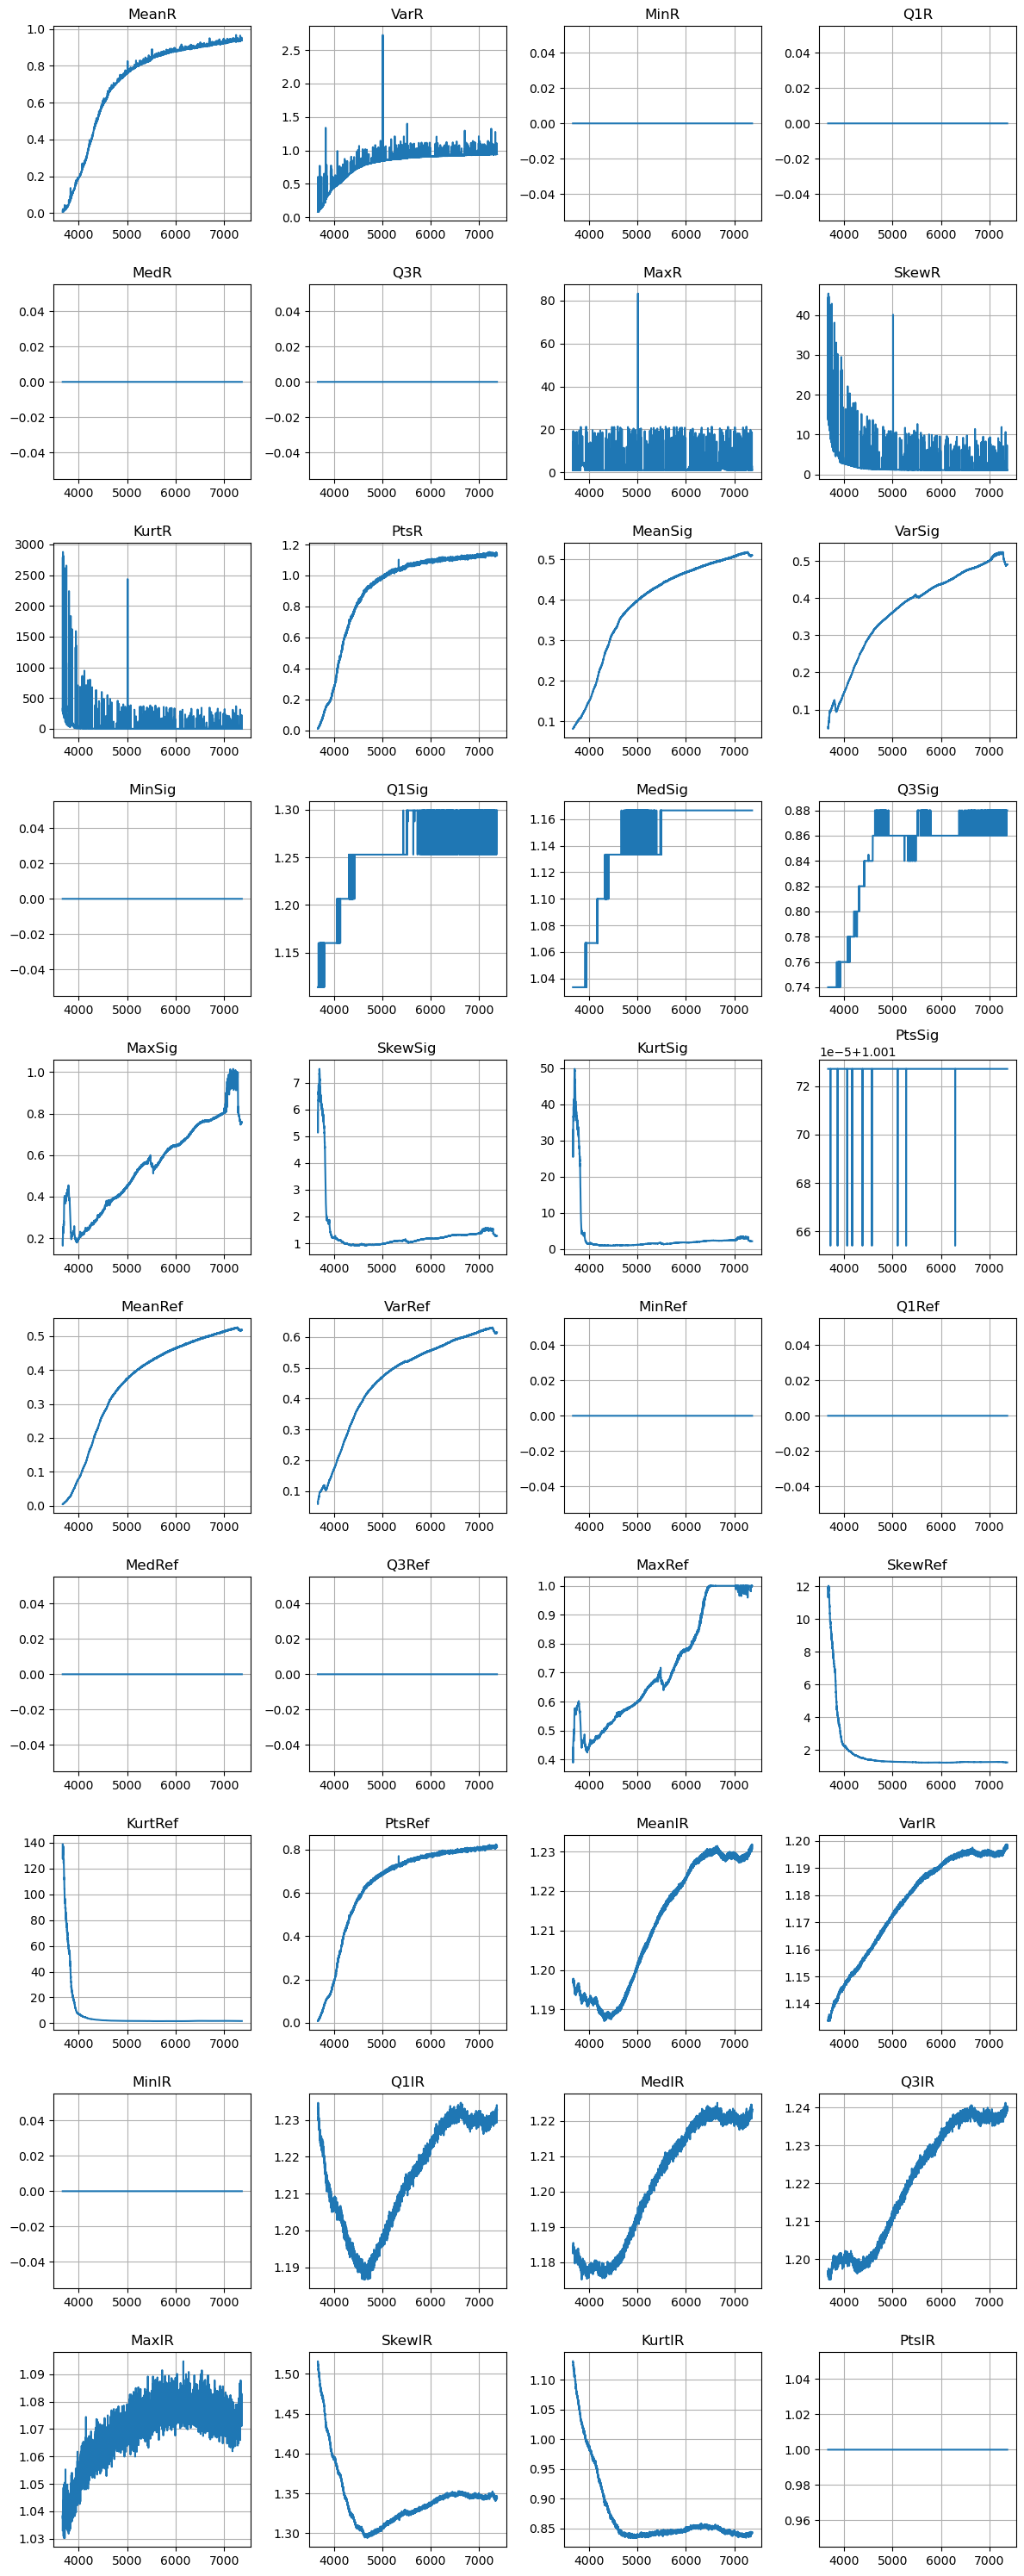

In [91]:
plot_uva(df1, features)

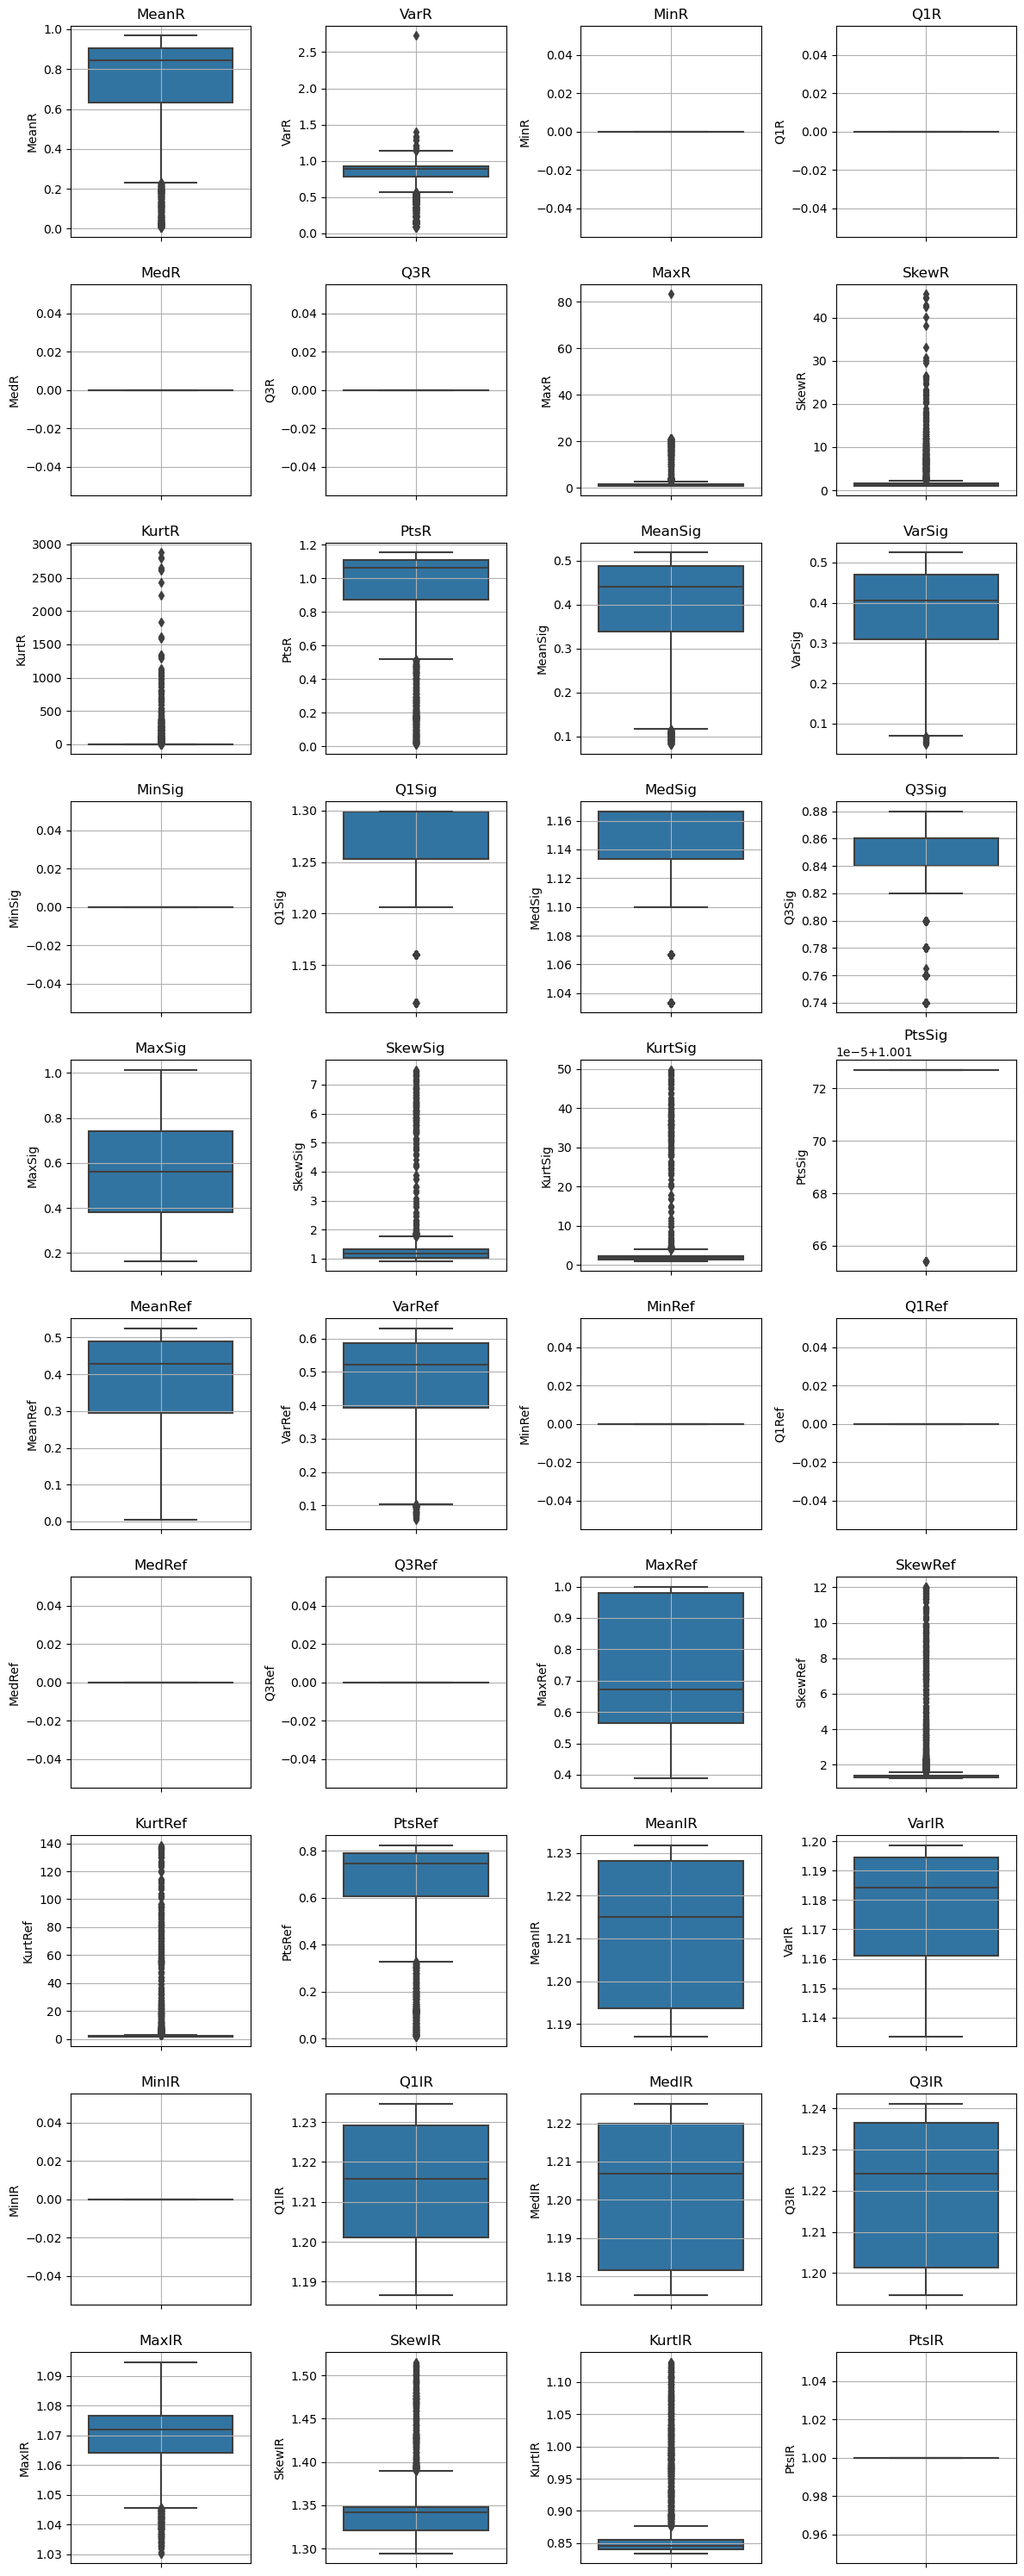

In [92]:
plot_uva(df1, features, plot_type='box')

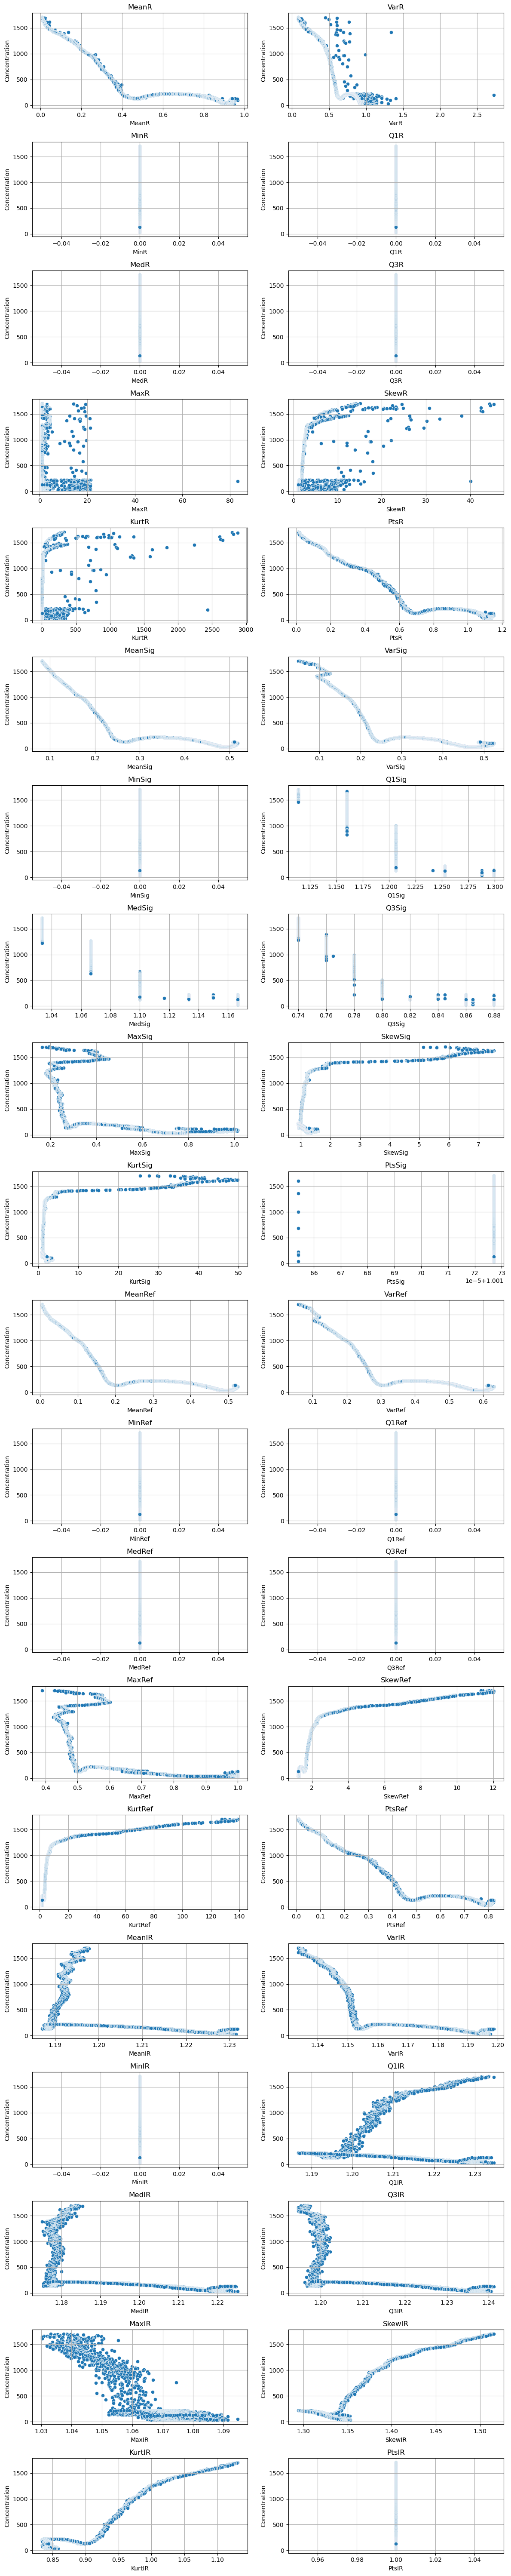

In [93]:
plot_bva(df1, features, target)

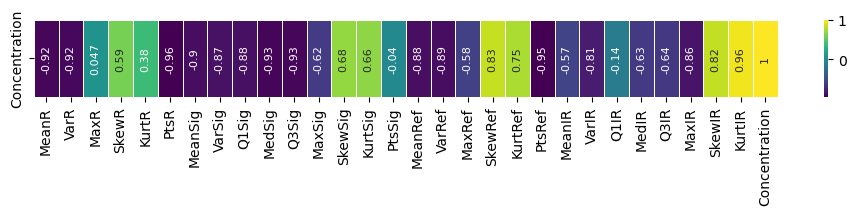

In [177]:
corr_res = plot_corr(df1, features, target)

## Features interdependancy

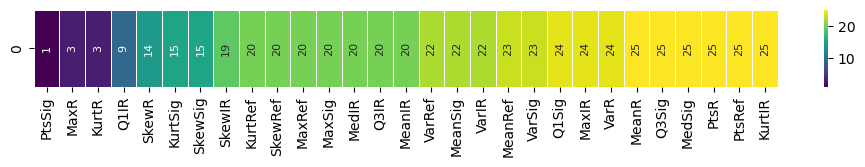

In [172]:
plot_corr(df1, features, plot_type='Features')

# EDA - Experiment 3 Data

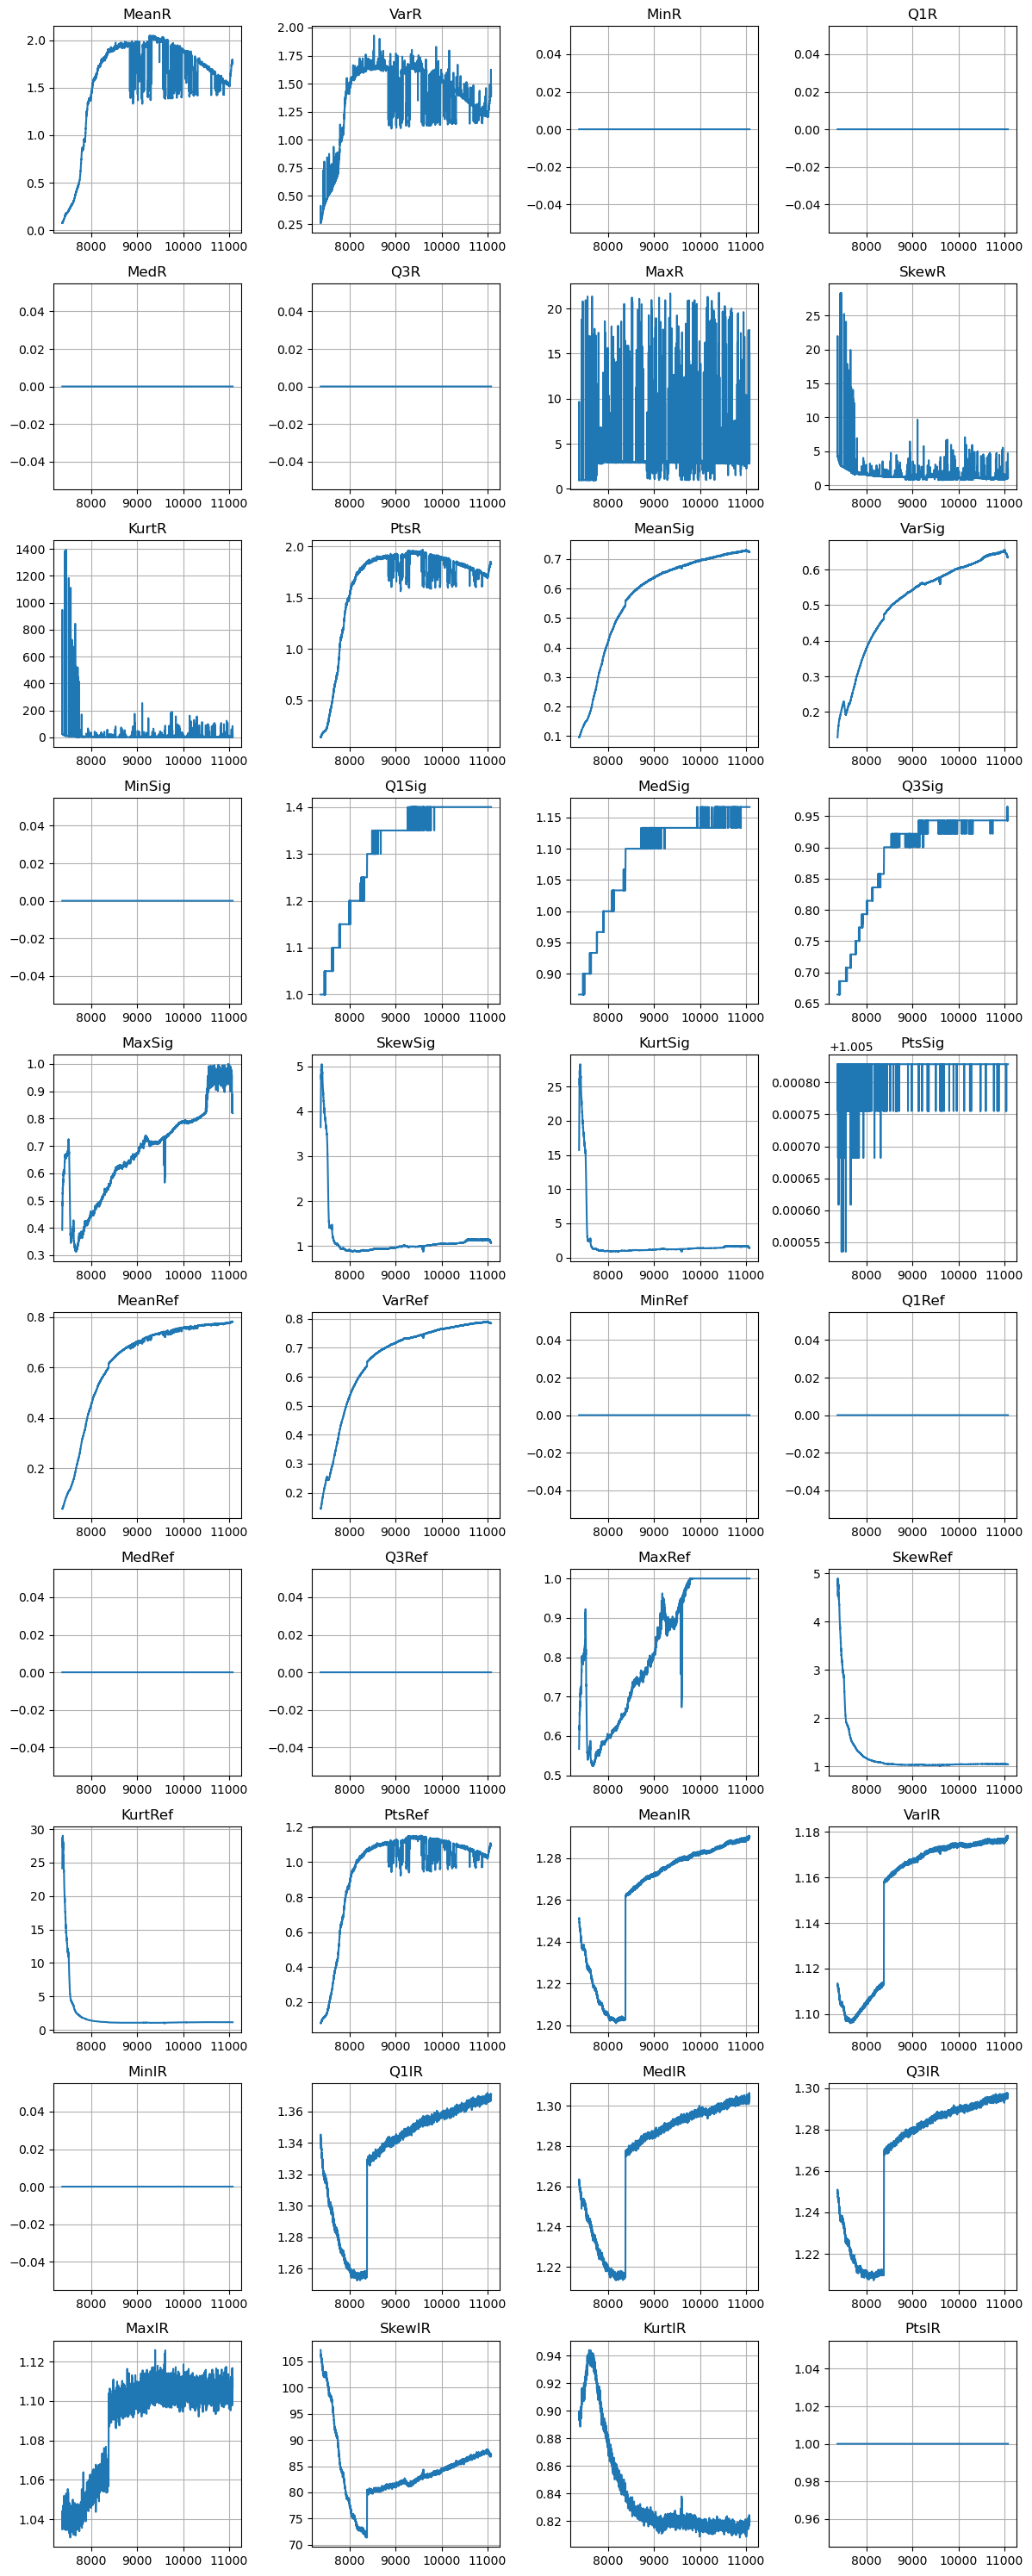

In [95]:
plot_uva(df2, features)

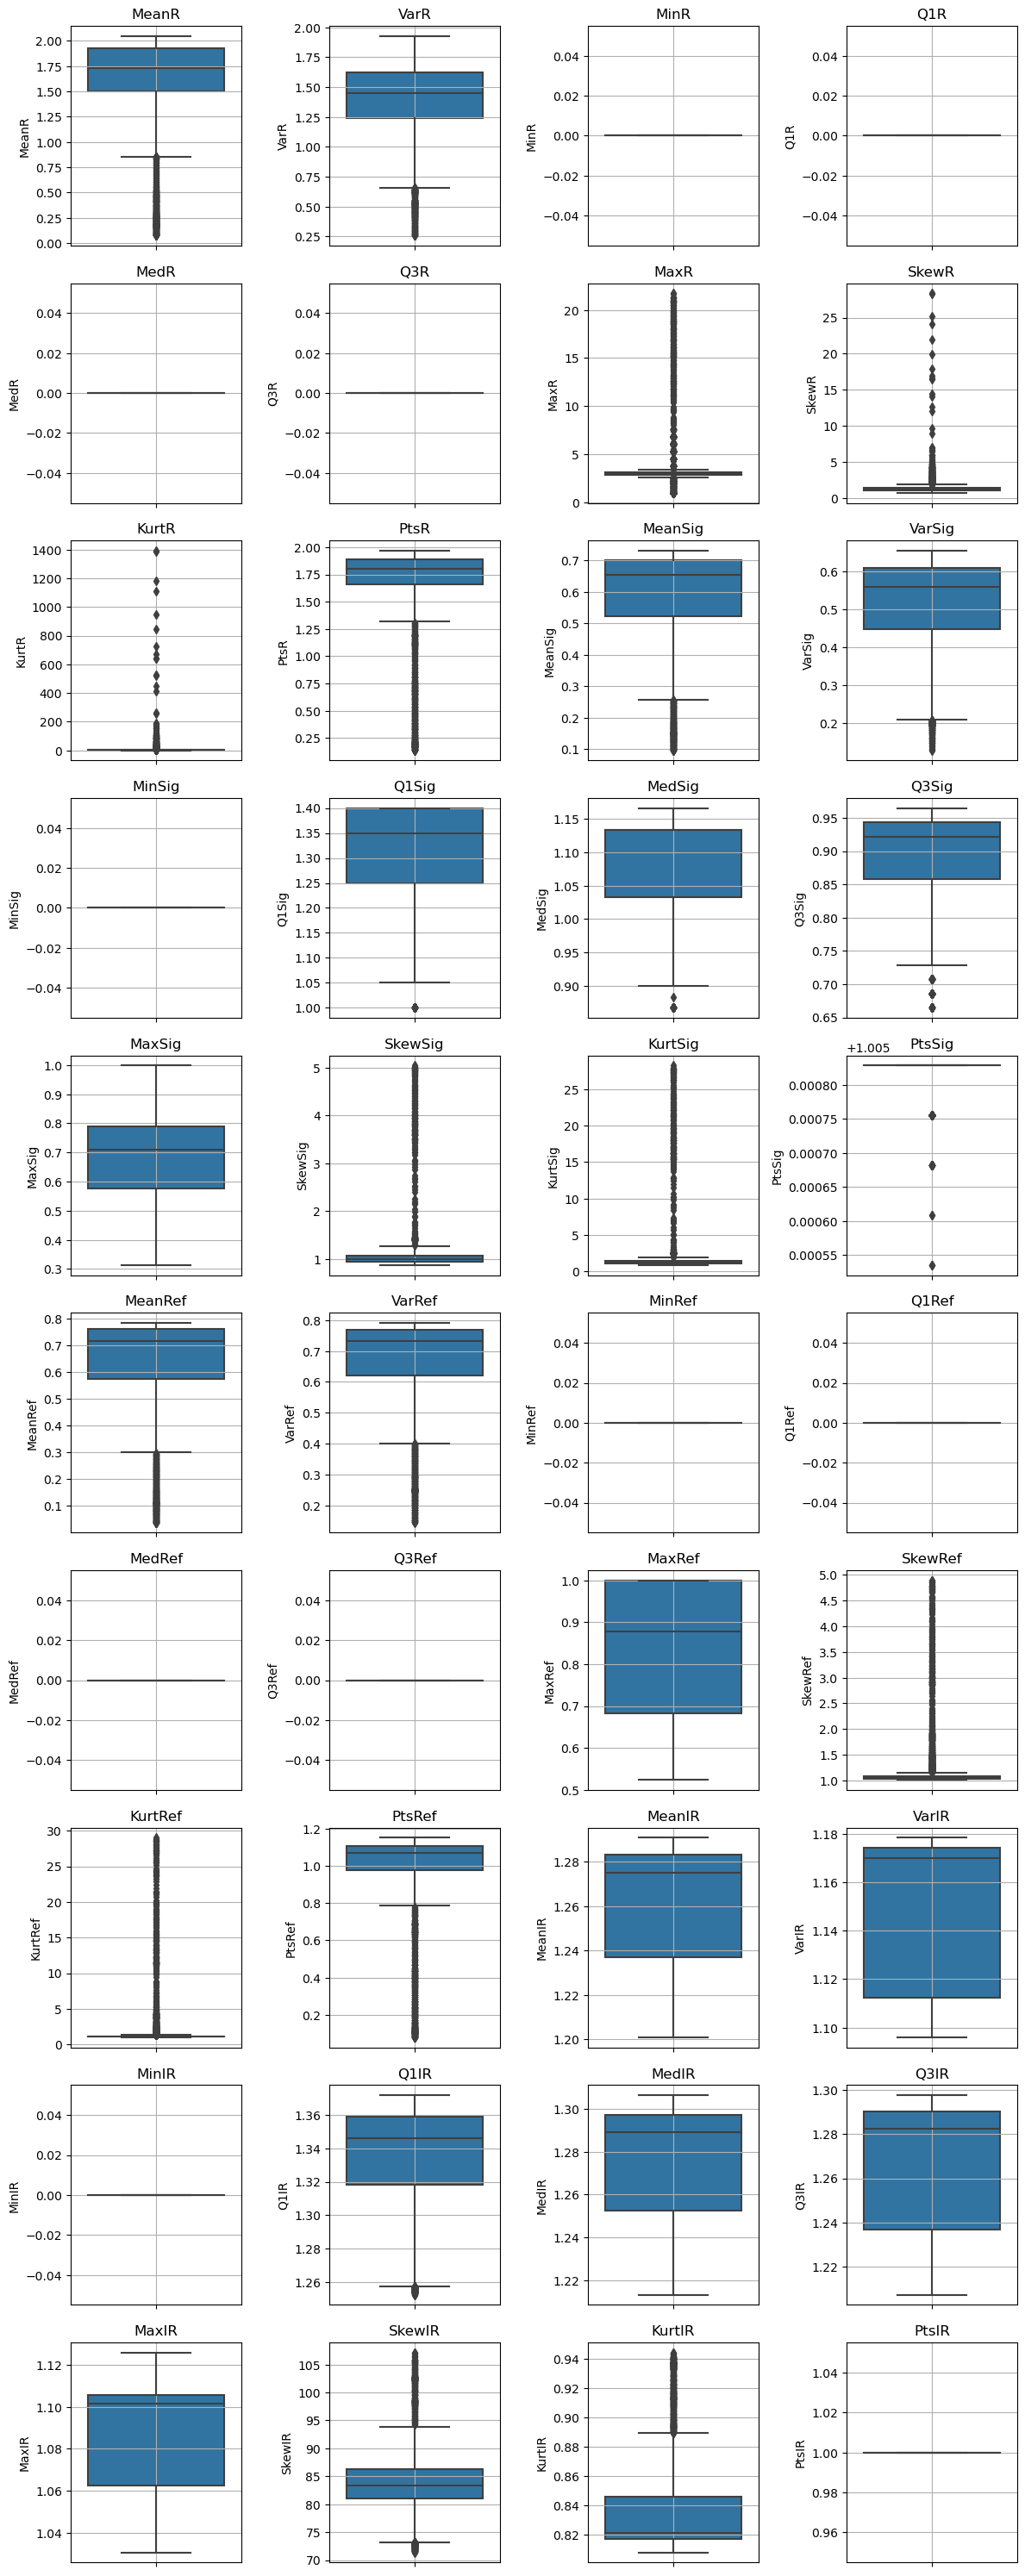

In [96]:
plot_uva(df2, features, plot_type='box')

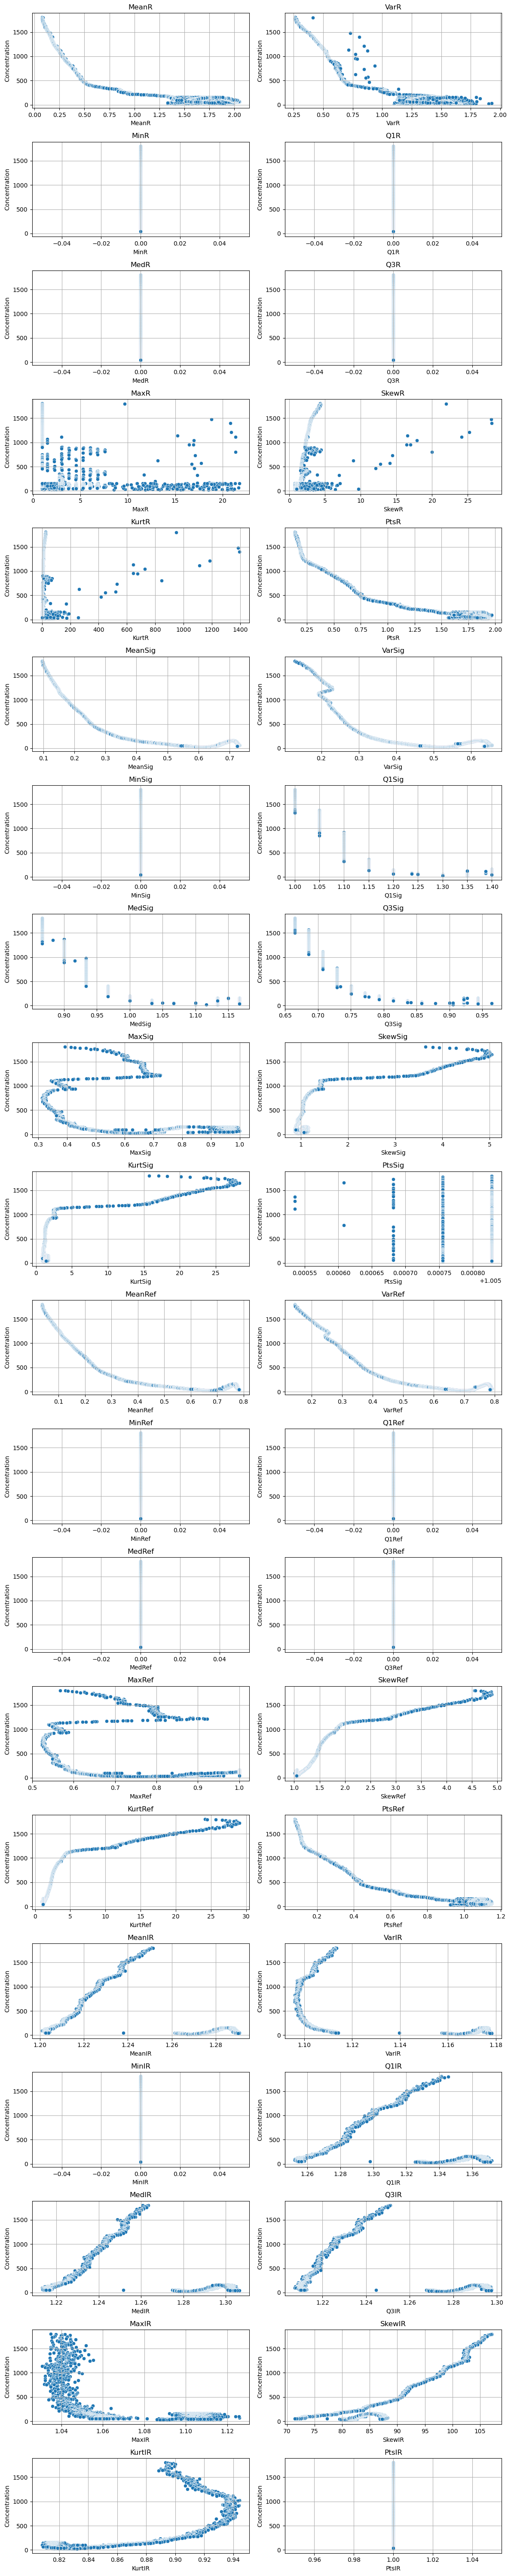

In [97]:
plot_bva(df2, features, target)

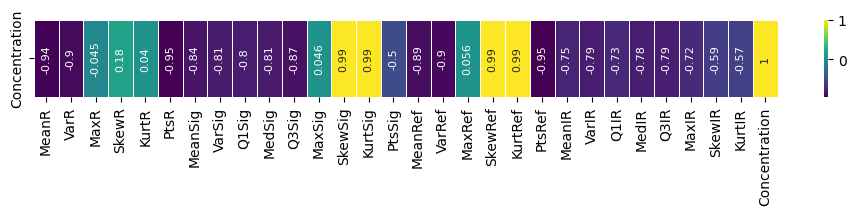

In [176]:
corr_res = plot_corr(df3, features, target)

## Features interdependancy

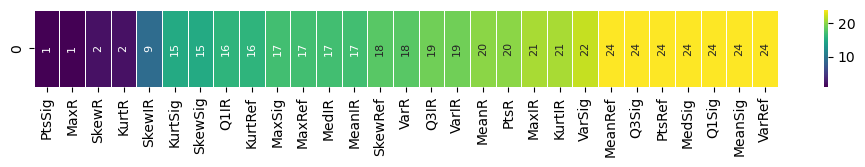

In [175]:
plot_corr(df2, features, plot_type='Features')

# EDA - Experiment 4 Data

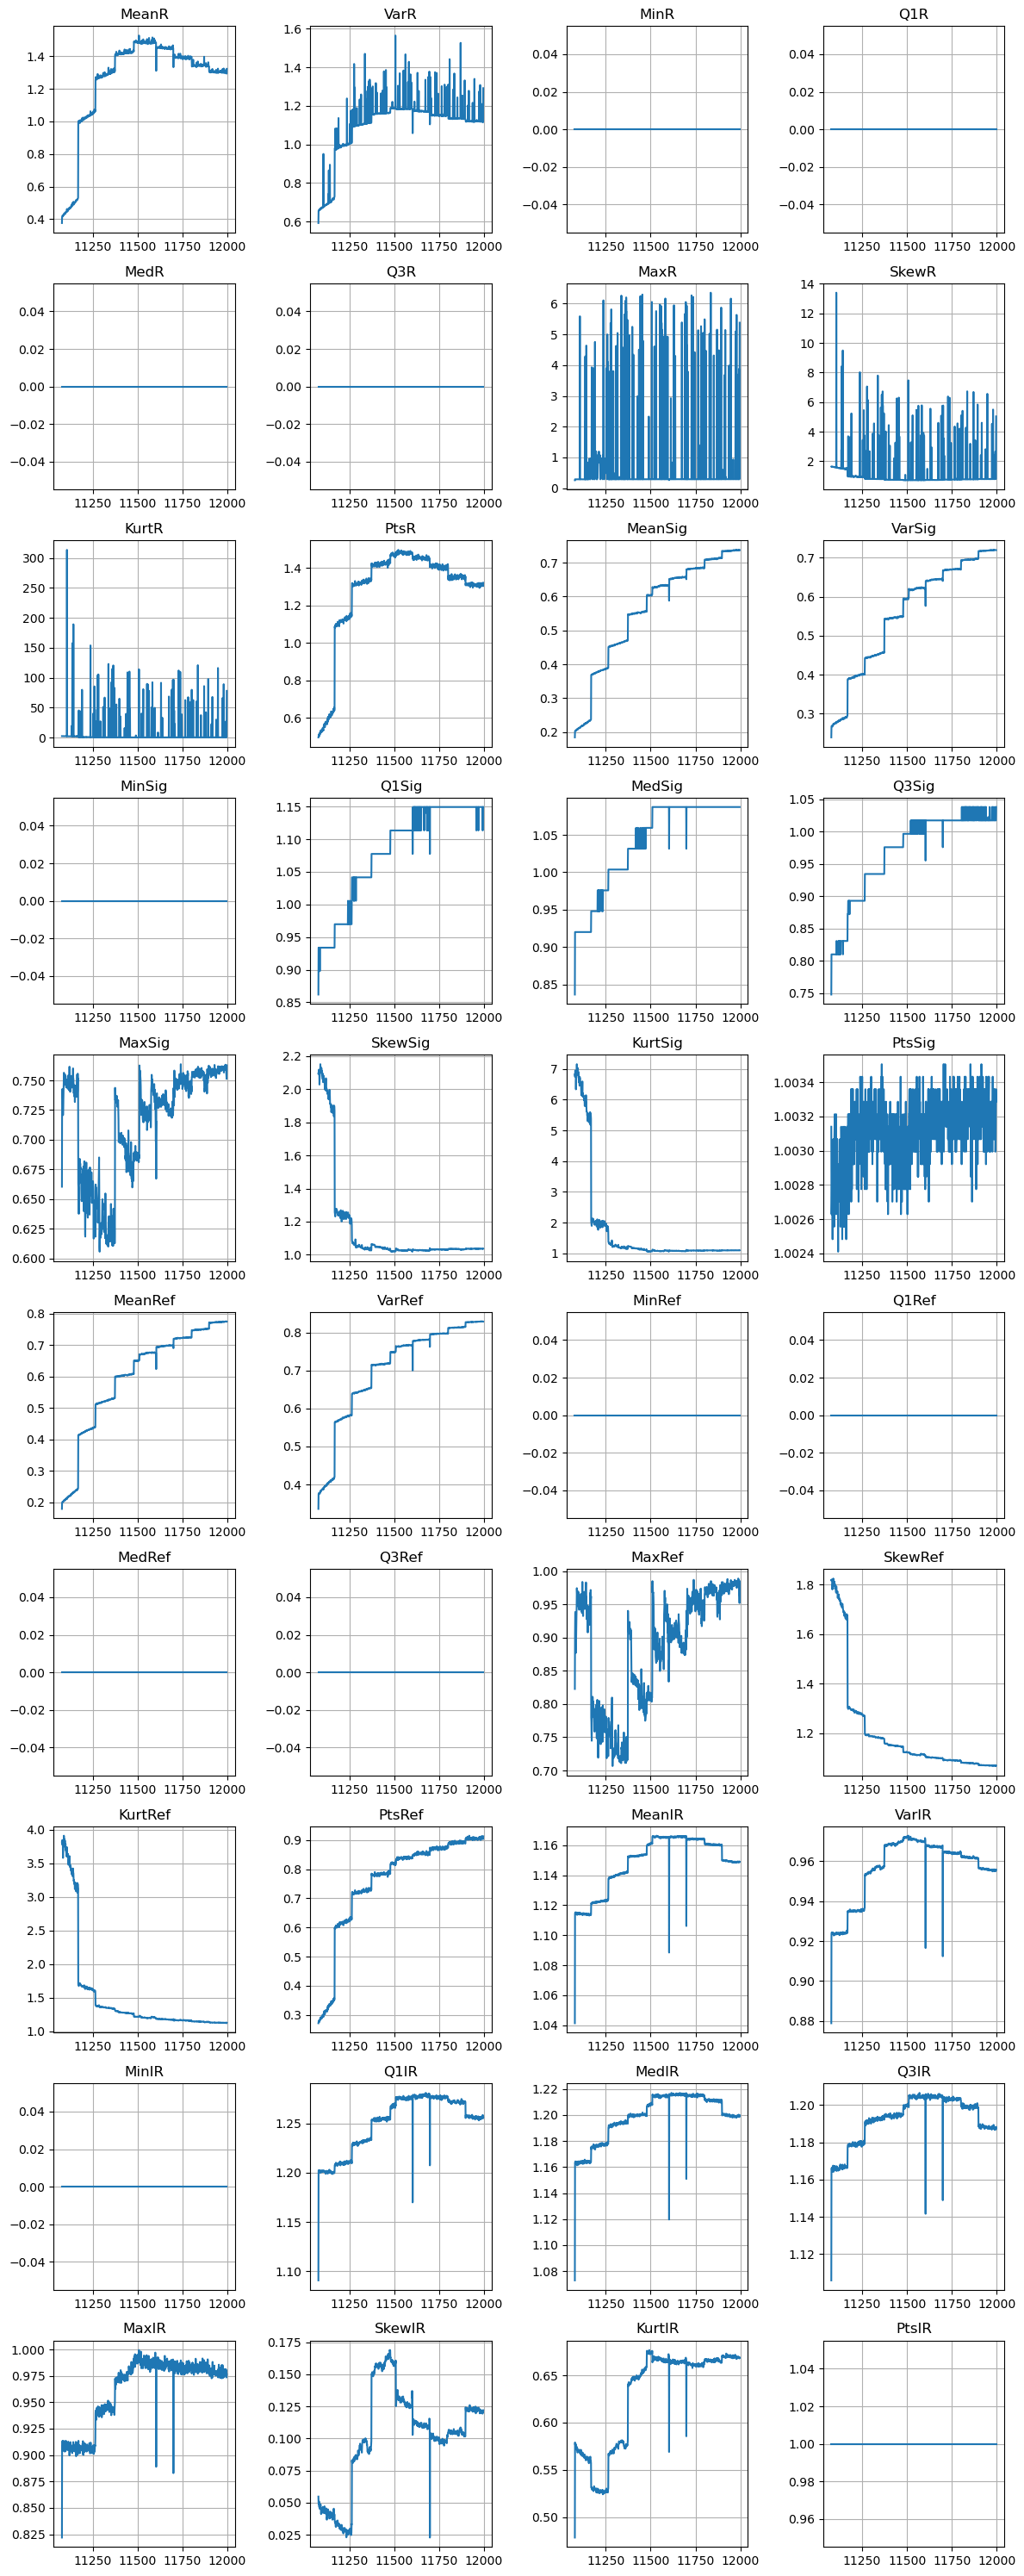

In [99]:
plot_uva(df3, features)

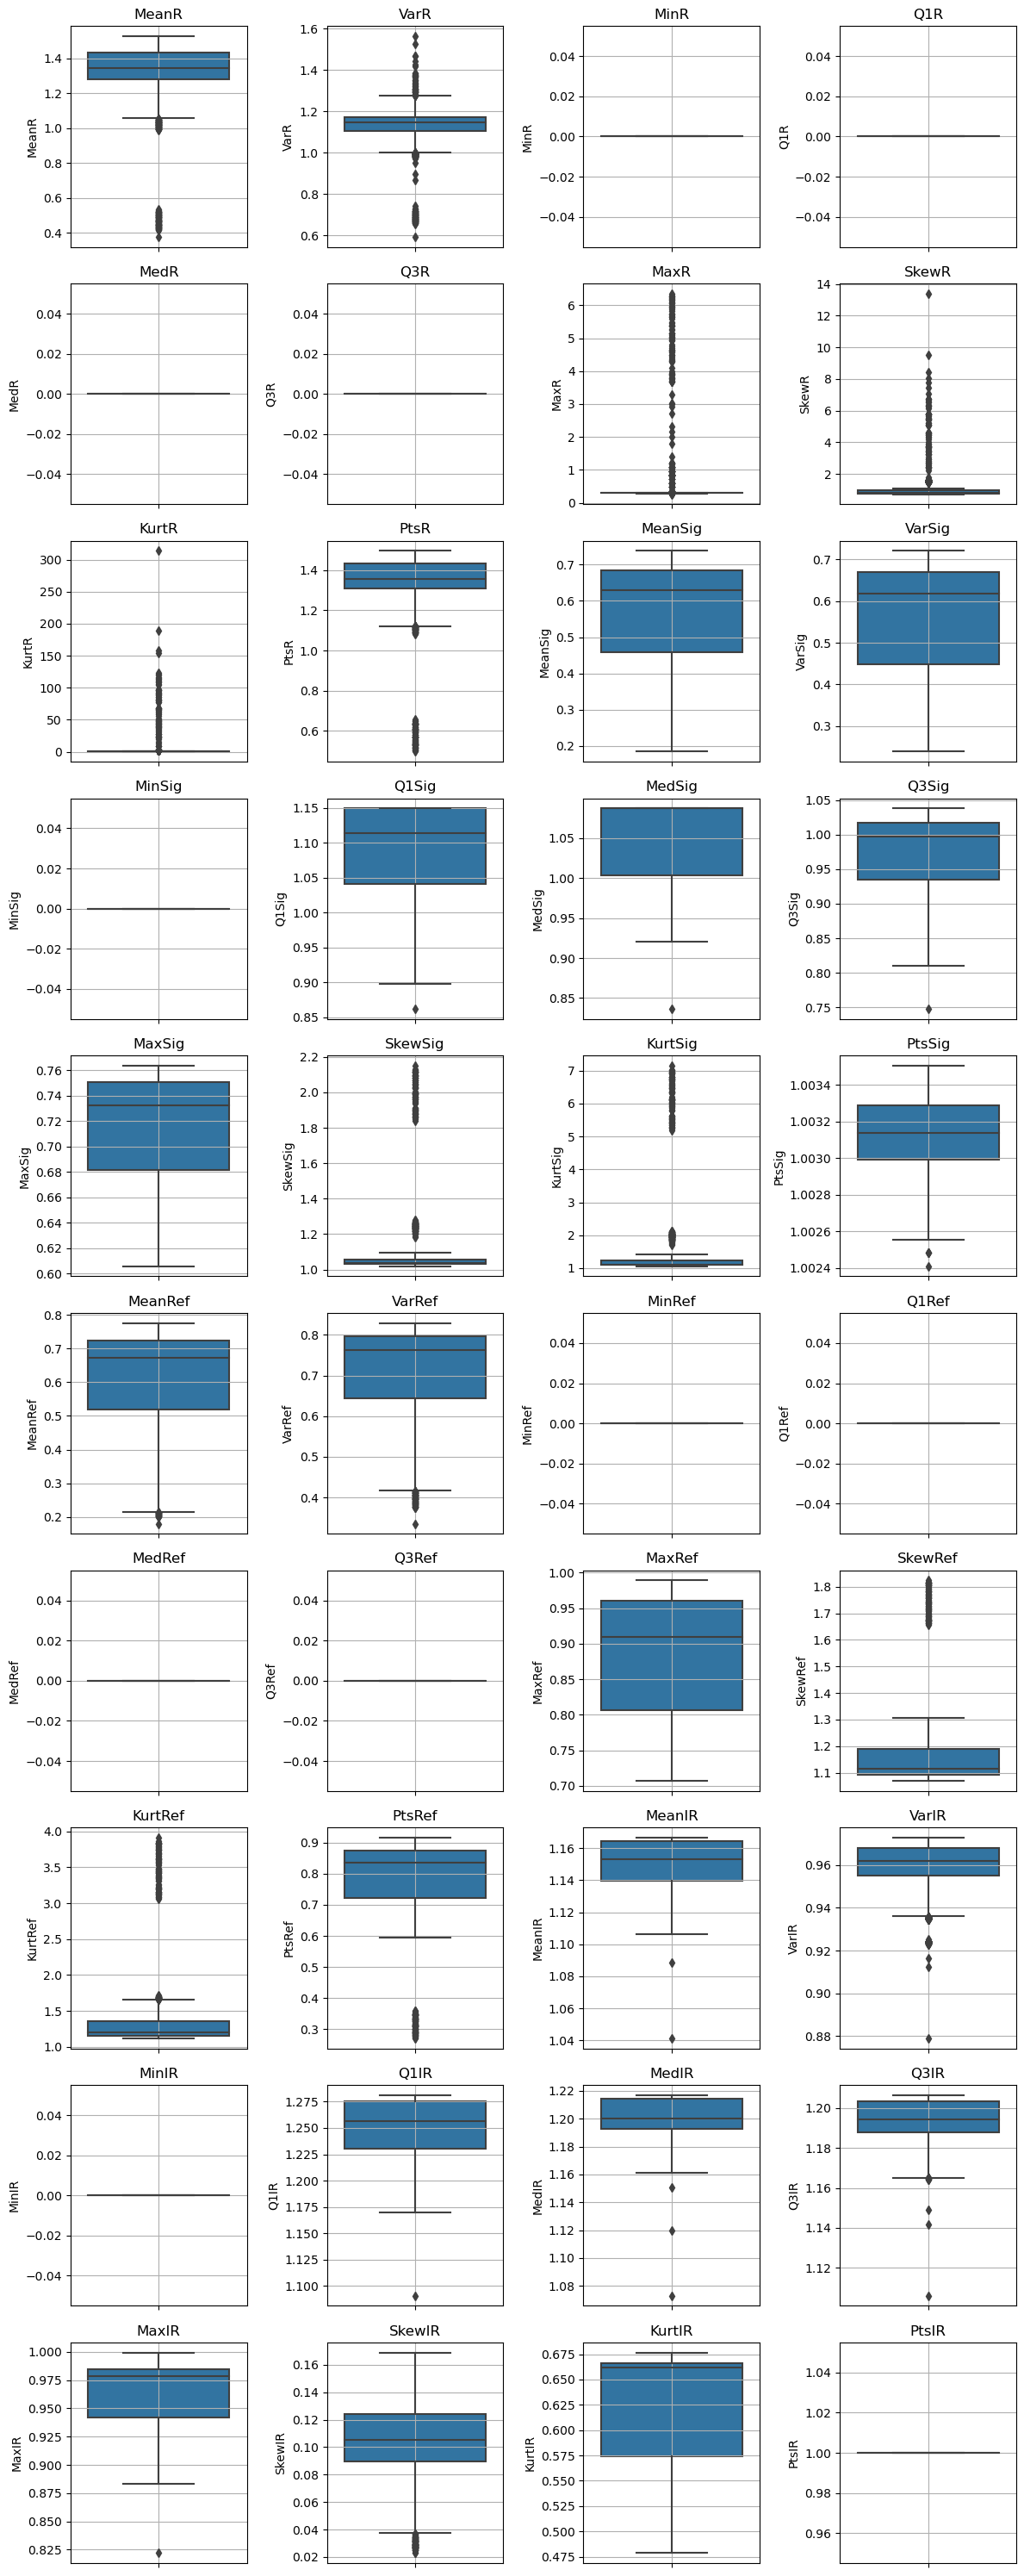

In [100]:
plot_uva(df3, features, plot_type='box')

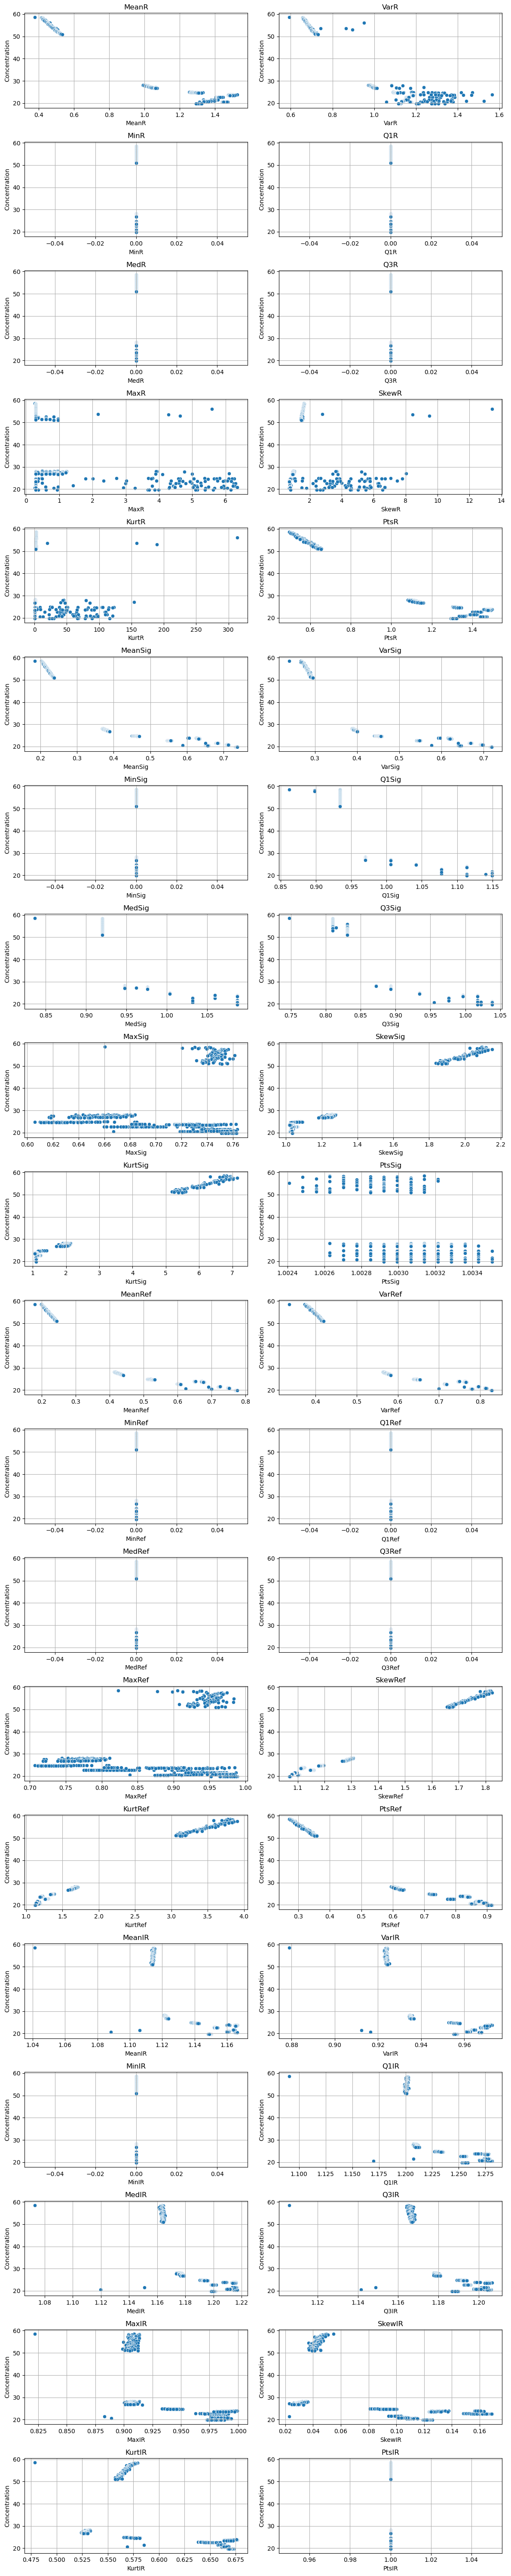

In [101]:
plot_bva(df3, features, target)

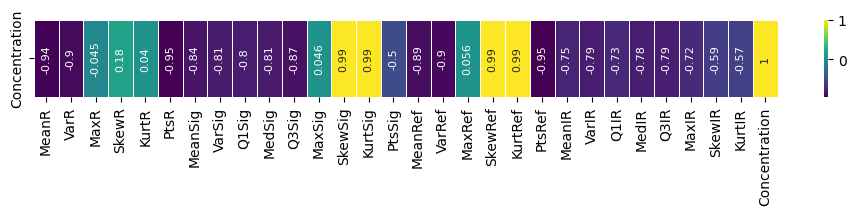

In [174]:
corr_res = plot_corr(df3, features, target)

## Features interdependancy

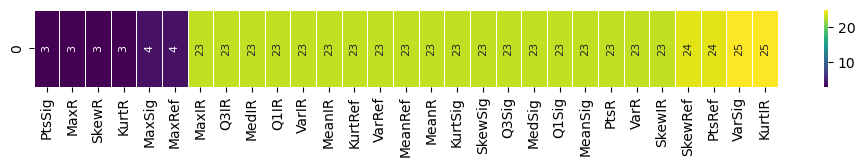

In [173]:
plot_corr(df3, features, plot_type='Features')

## Multicollinearity Analysis

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
X = df0.drop(insig_features, axis=1).iloc[:, 4:-1].head()
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [68]:
vif

Feature  VIF
0     MeanR  inf
1      VarR  inf
2      MaxR  inf
3     SkewR  inf
4     KurtR  inf
5      PtsR  inf
6   MeanSig  inf
7    VarSig  inf
8     Q1Sig  0.0
9    MedSig  0.0
10    Q3Sig  inf
11   MaxSig  inf
12  SkewSig  inf
13  KurtSig  inf
14  MeanRef  inf
15   VarRef  inf
16   MaxRef  inf
17  SkewRef  inf
18  KurtRef  inf
19   PtsRef  inf
20   MeanIR  inf
21    VarIR  inf
22     Q1IR  inf
23    MedIR  inf
24     Q3IR  inf
25    MaxIR  inf
26   SkewIR  inf
27   KurtIR  inf

# All Experiments Combined

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [99]:
scaler = RobustScaler()
df_all = df0.iloc[:, 4:-1]

In [100]:
df_all_scaled = scaler.fit_transform(df_all)

In [101]:
pca = PCA(n_components=df_all.shape[1])

In [102]:
pca.fit(df_all_scaled)

PCA(n_components=40)

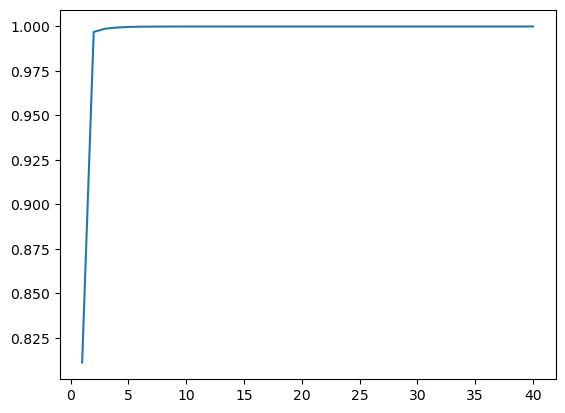

In [103]:
plt.plot(np.arange(1,df_all.shape[1]+1), pca.explained_variance_ratio_.cumsum())

In [104]:
comb = [[a, b] for a, b in zip(np.arange(1,df_all.shape[1]+1), pca.explained_variance_ratio_.cumsum())]
pd.DataFrame(comb)

0         1
0    1  0.811136
1    2  0.996928
2    3  0.998765
3    4  0.999401
4    5  0.999741
5    6  0.999885
6    7  0.999927
7    8  0.999955
8    9  0.999974
9   10  0.999985
10  11  0.999990
11  12  0.999994
12  13  0.999996
13  14  0.999997
14  15  0.999998
15  16  0.999999
16  17  0.999999
17  18  0.999999
18  19  1.000000
19  20  1.000000
20  21  1.000000
21  22  1.000000
22  23  1.000000
23  24  1.000000
24  25  1.000000
25  26  1.000000
26  27  1.000000
27  28  1.000000
28  29  1.000000
29  30  1.000000
30  31  1.000000
31  32  1.000000
32  33  1.000000
33  34  1.000000
34  35  1.000000
35  36  1.000000
36  37  1.000000
37  38  1.000000
38  39  1.000000
39  40  1.000000

In [105]:
X = pca.transform(df_all_scaled)

In [106]:
X.shape

(3668, 40)

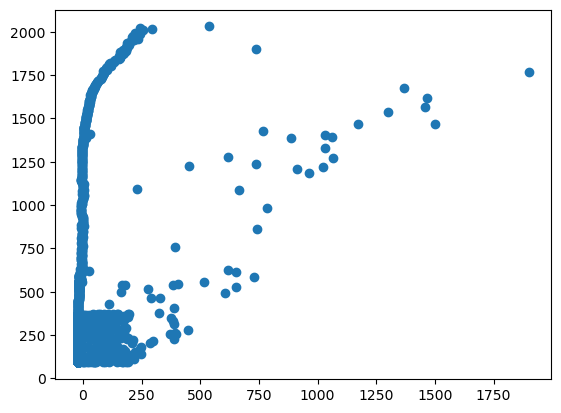

In [108]:
plt.scatter(X[:,0], df0['Concentration'])